In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import time

In [5]:
titles = pd.read_csv('C:/Users/DELL/Desktop/Datascience Course/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [6]:
cast = pd.read_csv('C:/Users/DELL/Desktop/Datascience Course/cast.csv')
cast.head()

,title,year,name,type,character,n,1029932
0,Miss Jerry,1894,Chauncey Depew,actor,Himself - the Director of the New York Central...,NaN,NaN
1,Miss Jerry,1894,William Courtenay,actor,Mr. Hamilton,NaN,NaN
2,Valsons,1905,Armand Dranem,actor,Himself,NaN,NaN
3,The Story of the Kelly Gang,1906,Jack (II) Ennis,actor,Steve Hart,NaN,NaN
4,The Joe Gans-Battling Nelson Fight,1906,Joe Gans,actor,Himself,1.0,NaN


In [7]:
pd.concat([titles,cast])

,title,year,name,type,character,n,1029932
0,The Rising Son,1990,NaN,NaN,NaN,NaN,NaN
1,The Thousand Plane Raid,1969,NaN,NaN,NaN,NaN,NaN
2,Crucea de piatra,1993,NaN,NaN,NaN,NaN,NaN
3,Country,2000,NaN,NaN,NaN,NaN,NaN
4,Gaiking II,2011,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1048570,Clutch Control,2022,Josh (XXII) Baker,actor,Alex Simmons,NaN,NaN
1048571,Clutch Control,2022,Karl Hughes,actor,Dewie Dayton,NaN,NaN
1048572,The Burning Skies,2022,Noah Hobbs,actor,Will Norton,NaN,NaN
1048573,Out of the Mountains,2022,Tallis Clayton,actor,John Allen,NaN,NaN


In [28]:
merge_data = titles.merge(cast, on=['title','year'], how = 'outer')

In [29]:
merge_data

,title,year,name,type,character,n,1029932
0,The Rising Son,1990,NaN,NaN,NaN,NaN,NaN
1,The Thousand Plane Raid,1969,Barry Atwater,actor,Gen. Conway,11.0,NaN
2,The Thousand Plane Raid,1969,Bo Hopkins,actor,Capt. Douglass,9.0,NaN
3,The Thousand Plane Raid,1969,Charles Dierkop,actor,Railla,15.0,NaN
4,The Thousand Plane Raid,1969,Christopher George,actor,Col. Greg Brandon,1.0,NaN
...,...,...,...,...,...,...,...
1115169,1-Jan,2016,Troy Bogdan,actor,Union Meeting Attendee,NaN,NaN
1115170,2-Jan,2017,Antonio Buccarello,actor,Davide Grulli,NaN,NaN
1115171,2-Jan,2017,Fabrizio Croci,actor,Leo Baretti,4.0,NaN
1115172,2-Jan,2017,Piergiorgio Gallicani,actor,Padre,NaN,NaN


In [30]:
merge_data.dtypes

title         object
year           int64
name          object
type          object
character     object
n            float64
1029932      float64
dtype: object

### What are the ten most common movie names of all time?

In [31]:
merge_data.groupby(['title']).size().sort_values(ascending = False ).head(10)

title
Around the World in Eighty Days       383
7 cajas                               191
The Dark Knight Rises                 173
The Ten Commandments                  167
The Buccaneer                         158
King Kong                             158
Cockneys vs Zombies                   157
Stuck on You                          153
The Eschatrilogy: Book of the Dead    144
Thelma                                139
dtype: int64

### Which three years of the 1930s saw the most films released?

In [32]:
merge_data[(merge_data['year']>=1920)&(merge_data['year']<=1930)].groupby(['year']).size().sort_values(ascending = False).head(3)

year
1930    3286
1920    2667
1929    2455
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [37]:
merge_data[merge_data['year']==merge_data.year//10*10]['title'].nunique()

20684

In [40]:
merge_data.year//10*10

0          1990
1          1960
2          1960
3          1960
4          1960
           ... 
1115169    2010
1115170    2010
1115171    2010
1115172    2010
1115173    2010
Name: year, Length: 1115174, dtype: int64

### Plot the number of "Hamlet" films made each decade.

In [46]:
a = merge_data[(merge_data['title']=='Hamlet') & (merge_data['year']==merge_data.year//10*10)]['title'].count()
print("Number of 'Hamlet' films made each decade are - {}".format(a))

Number of 'Hamlet' films made each decade are - 21


### Plot the number of "Rustler" characters in each decade of the history of film.

In [49]:
a = merge_data[(merge_data['title']=='Rustler') & (merge_data['year']==merge_data.year//10*10)]['title'].count()
print("Number of 'Rustler' films made each decade are - {}".format(a))

Number of 'Rustler' films made each decade are - 0


### What are the 11 most common character names in movie history?

In [51]:
merge_data.groupby(['character']).size().sort_values(ascending = False ).head(10)

character
Himself      8438
Policeman    3043
Doctor       2799
Extra        2765
Reporter     2692
Townsman     2634
Bartender    2414
Waiter       2296
Henchman     2140
Dancer       2002
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [53]:
merge_data[merge_data['character']=='Herself'].groupby('name').size().sort_values(ascending = False).head(10)

name
Aleli Estrada       1
Ali Harter          1
Voin de Voin        1
Velvet Crayon       1
Taylor Christina    1
Sui the Dog         1
Sharon A. Fox       1
Ren? Biaggi         1
Rebecca Hudson      1
Nelly Diener        1
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [56]:
merge_data[merge_data['character']=='Himself'].groupby('name').size().sort_values(ascending = False).head(10)

name
Adolf Hitler         99
George W. Bush       23
Winston Churchill    23
Bill Clinton         20
Muhammad Ali         17
Billy Graham         15
Amitabh Bachchan     13
Jimmy Carter         13
Walter Cronkite      11
Fidel Castro         11
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [62]:
merge_data[(merge_data['year'] == 1945)].groupby(['name','type']).size().sort_values(ascending = False).head(1)

name             type 
Sam (II) Harris  actor    32
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

<AxesSubplot:xlabel='year'>

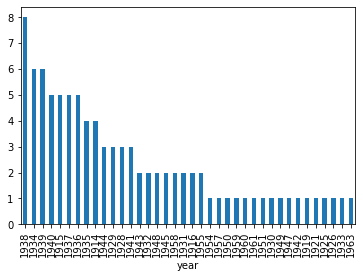

In [80]:
merge_data[merge_data['name']=='Donald Crisp'].groupby(['year']).size().sort_values(ascending = False).plot(kind='bar')


### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [87]:
cast[cast['character'].str.startswith('Patron in')]['character'].value_counts().head(10).index.tolist()

['Patron in Frisky Rabbit',
 'Patron in the Coffee House',
 'Patron in Club',
 'Patron in restaurant',
 'Patron in Coffee Shop',
 'Patron in booth',
 'Patron in Restaurant',
 'Patron in Audience',
 'Patron in Black',
 'Patron in Store']

### What are the 10 most frequent roles that start with the word "Science"?

In [90]:
cast[cast['character'].str.startswith('Science')]['character'].value_counts().head(10).index.tolist()

['Science Teacher',
 'Science Student',
 'Science Club Member',
 'Science Fair Kid',
 'Science Kid',
 'Science Reporter',
 'Science Performer 3',
 'Science Lab Guard',
 'Science Lab Guard 2',
 'Science Kid #1']

### Plot the n-values of the roles that Judi Dench has played over her career.

In [93]:
merge_data[merge_data['name']=='Judi Dench']['character'].head(15)

Series([], Name: character, dtype: object)

### Plot the n-values of Cary Grant's roles through his career.

In [95]:
merge_data[merge_data['name']=="Cary Grant's"]['character'].head(15)

Series([], Name: character, dtype: object)

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

In [99]:
merge_data[merge_data['name']=="Sidney Poitier"]['character'].head(15)

Series([], Name: character, dtype: object)

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [100]:
merge_data[(merge_data['year']==1950) &(merge_data['n'] == 1)].groupby('type').size()

type
actor    281
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [102]:
merge_data[(merge_data['year']==1950) &(merge_data['n'] == 2)].groupby('type').size()

type
actor    219
dtype: int64